# Conversion Rate Challenge


## Objectif

Optimiser des taux de conversion est une des tâches les plus importantes d'un data scientist.

C'est pourquoi, nous allons construire un modèle qui va prédire le taux de conversion de clients sur un site web et faire des recommandations à notre équipe marketing pour pouvoir augmenter notre revenu.


## Description du challenge

Nous avons récolté des données à propos d'utilisateurs du site d'une entreprise _anonyme_. Votre projet est de :

1. Créer un modèle de prédiction du taux de conversion (l'utilisateur va-t-il convertir ou non?).

2. Trouver des recommandations à faire pour l'équipe Produit & Marketing afin qu'ils puissent améliorer ce taux de conversion.

## Données

Vous pourrez trouver les données dans votre dossier Projet -- CONVERSION RATE

In [14]:
pip install s3fs

  Using cached s3fs-0.5.1-py3-none-any.whl (21 kB)
  Using cached aiobotocore-1.1.1-py3-none-any.whl (45 kB)
Processing /home/jovyan/.cache/pip/wheels/5f/fd/9e/b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73/wrapt-1.12.1-cp38-cp38-linux_x86_64.whl
  Using cached aioitertools-0.7.0-py3-none-any.whl (20 kB)
  Using cached aiohttp-3.6.2-py3-none-any.whl (441 kB)
  Using cached botocore-1.17.44-py2.py3-none-any.whl (6.5 MB)
  Using cached async_timeout-3.0.1-py3-none-any.whl (8.2 kB)
  Using cached multidict-4.7.6-cp38-cp38-manylinux1_x86_64.whl (162 kB)
  Using cached yarl-1.6.0-cp38-cp38-manylinux1_x86_64.whl (262 kB)
  Using cached jmespath-0.10.0-py2.py3-none-any.whl (24 kB)
  Using cached docutils-0.15.2-py3-none-any.whl (547 kB)
Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas
import matplotlib.pyplot as plt
pandas.set_option('display.max_columns', 10)
pandas.set_option('display.width', 350)

In [205]:
data=pandas.read_csv("s3://full-stack-bigdata-datasets/Machine Learning Supervisé/Projet Conversion Rate/conversion_data.csv")

In [17]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [20]:
data.describe(include='all')

,country,age,new_user,source,total_pages_visited,converted
count,316200,316200.000000,316200.000000,316200,316200.000000,316200.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,178092,NaN,NaN,155040,NaN,NaN
mean,NaN,30.569858,0.685465,NaN,4.872966,0.032258
std,NaN,8.271802,0.464331,NaN,3.341104,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


In [22]:
print(data.groupby(['country']).size())

country
China       76602
Germany     13056
UK          48450
US         178092
dtype: int64


In [24]:
print(data.groupby(['source']).size())

source
Ads        88740
Direct     72420
Seo       155040
dtype: int64


A few quick observations:

* the site is probably a US site, although it does have a large Chinese user base as well

* user base is pretty young

* conversion rate at around 3% is industry standard. It makes sense

* everything seems to make sense here except for max age 123 yrs! Let’s investigate it: 

In [25]:
print(sorted(data['age'].unique(),reverse=True))

[123, 111, 79, 77, 73, 72, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17]


In [26]:
print(data[data['age']>110])

        country  age  new_user source  total_pages_visited  converted
90928   Germany  123         0    Seo                   15          1
295581       UK  111         0    Ads                   10          1


It is just 2 users! In this case, we can remove them, nothing will change. In general, depending on the problem, you can:

remove the entire row saying you don’t trust the data

treat them as NAs

if there is a pattern, try to figure out what went wrong.

That being said, wrong data is worrisome and can be an indicator of some bug in the logging code. Therefore, when working, you will want to talk to the software engineer who implemented the logging code to see if, perhaps, there are some bugs which affect the data significantly.

Here, let’s just get rid of those two rows:

In [206]:
data.drop(data.loc[data['age']>110].index, inplace=True)
#data = data[data.age > 110]

In [207]:
data[data.age > 110]

,country,age,new_user,source,total_pages_visited,converted


Now, let’s quickly investigate the variables and how their distribution differs for the two classes. This will help us understand whether there is any information in our data in the first place and get a sense of the data.

Never start by blindly building a machine learning model. Always first get a sense of the data 

Let’s just pick a couple of variables as example, but you should do it with all:

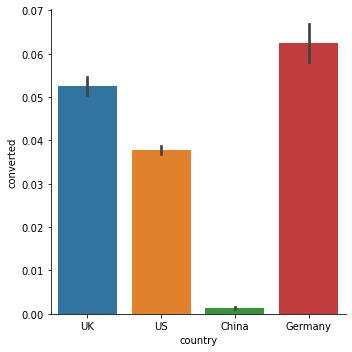

In [95]:
import seaborn as sns 
sns.catplot(y='converted', x='country', data=data, kind='bar')

Here it clearly looks like Chinese convert at a much lower rate than other countries! 

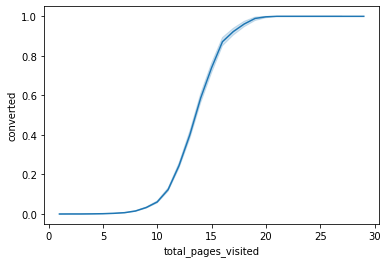

In [99]:
sns.lineplot(x=data['total_pages_visited'], y='converted', data=data)

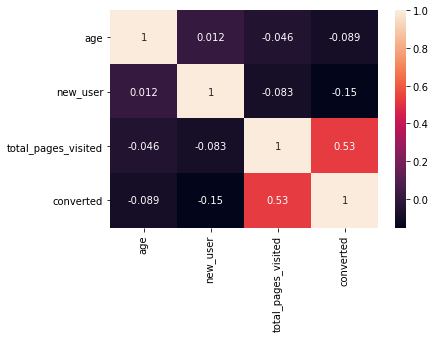

In [163]:
sns.heatmap(data.corr(), annot=True)

## Machine Learning Model

Normalizing Data:
- Dummyfication,
- Normalization

In [208]:
dummy_data = pd.get_dummies(data, drop_first=True)
dummy_data.head()

,age,new_user,total_pages_visited,converted,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,25,1,1,0,0,1,0,0,0
1,23,1,5,0,0,0,1,0,1
2,28,1,4,0,0,0,1,0,1
3,39,1,5,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,1


In [245]:
X=dummy_data.iloc[:,:-1]
y=dummy_data.iloc[:,-1]

### Logistic Linear Model
Splitting my sample set

In [308]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.30, random_state=2394)

Normalization and modelization on training set

In [309]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [310]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [311]:
log_reg_score_train = classifier.score(X_train,y_train)
log_reg_score_train

0.7187333399596997

In [312]:
log_reg_pred=classifier.predict(X_test)

In [313]:
log_reg_score_test = classifier.score(X_test,y_test)
log_reg_score_test

0.720809614168248

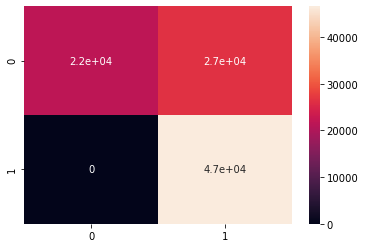

In [252]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, log_reg_pred, )
sns.heatmap(cm, annot=True)

Use Cross Validation for features selection

In [253]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=50)
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
cv_scores = cross_val_score(classifier, X_train, y_train, cv=50)
print('CV Score {}'.format(cv_scores.mean()))

CV Score 0.7188281425516979


CV Score is not improving so much with comparing to LogReg model

### DecisionTrees Classification: Random Forest Model

In [254]:
import numpy as np
np.random.seed(5649)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.30)

In [255]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_features=3,oob_score=True)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(max_features=3, oob_score=True)

In [257]:
rf_classifier.oob_score_

0.7102937588665299

In [258]:
rf_classifier.score(X_test, y_test)

0.7118912080961417

In [259]:
pandas.DataFrame(confusion_matrix(y_train, \
                                  rf_classifier.oob_decision_function_[:,1].round(), labels=[0,1]))

,0,1
0,53020,59843
1,4280,104195


In [260]:
rf_classifier.predict(X_test)

array([1, 1, 0, ..., 1, 1, 0], dtype=uint8)

In [261]:
pandas.DataFrame(confusion_matrix(y_test, rf_classifier.predict(X_test), labels=[0, 1]))

,0,1
0,22660,25636
1,1694,44870


In [262]:
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()
params = {'max_features':[3,4,5]}

grid =  GridSearchCV(estimator=rfc, param_grid= params, cv = 10)
grid.fit(X_train, y_train)

KeyboardInterrupt: 

In [157]:
grid.best_estimator_

RandomForestClassifier(max_features=4)

In [158]:
grid.best_params_

{'max_features': 4}

In [299]:
y_pred = grid.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred, normalize="true")
sns.heatmap(cm, annot=True, fmt='d')

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [263]:
X.drop(columns='total_pages_visited', inplace = True)

In [270]:
X

,age,new_user,converted,country_Germany,country_UK,country_US,source_Direct
0,25,1,0,0,1,0,0
1,23,1,0,0,0,1,0
2,28,1,0,0,0,1,0
3,39,1,0,0,0,0,0
4,30,1,0,0,0,1,0
...,...,...,...,...,...,...,...
316195,26,1,0,0,0,1,0
316196,27,1,0,0,0,1,1
316197,25,0,0,0,0,0,0
316198,22,0,0,0,0,1,0


In [271]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.30, random_state=23)

In [272]:
rf1_classifier = RandomForestClassifier(n_estimators=100, oob_score=True)
rf1_classifier.fit(X_train,y_train)

RandomForestClassifier(oob_score=True)

In [276]:
rf1_classifier.oob_score_

0.7181414849686905

In [275]:
rf1_classifier.score(X_test, y_test)

0.7200822264389627

In [280]:
rf1_classifier.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [292]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=rf1_classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.45      0.62     48302
           1       0.64      1.00      0.78     46558

    accuracy                           0.72     94860
   macro avg       0.82      0.73      0.70     94860
weighted avg       0.82      0.72      0.70     94860



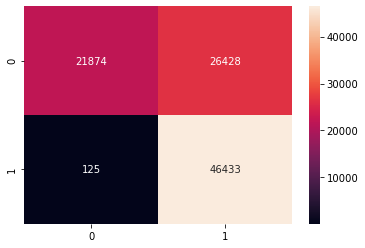

In [298]:
y1_pred = rf1_classifier.predict(X_test)
cm = confusion_matrix(y_test, rf1_classifier.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d')

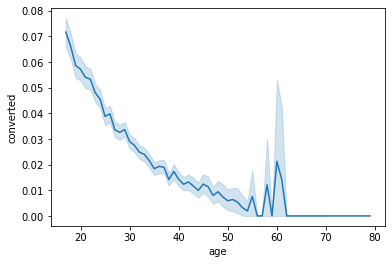

In [282]:
sns.lineplot(y='converted', x='age', data=data)

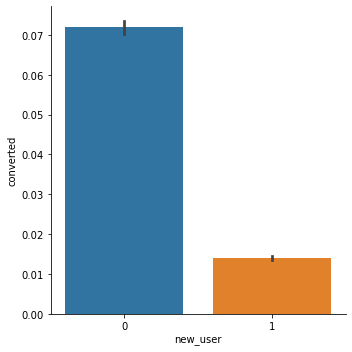

In [283]:
sns.catplot(y='converted', x='new_user', data=data, kind='bar')

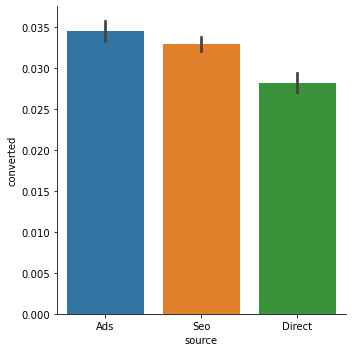

In [284]:
sns.catplot(y='converted', x='source', data=data, kind='bar')

This shows that:

Users with an old account are much better than new users

Germany, UK, and US are similar, with Germany being the best. Most importantly, they all have very very high values. As usual, we have to read this as relative to the reference level, which is China. So this means that not being from China and being from any of those 3 countries significantly increases the probability of conversion. That is, China is very bad for conversion

The site works very well for young people and gets worse for older people

Source is less relevant

The site is working very well for young users. Definitely let’s tell marketing to advertise and use channels which are more likely to reach young people.

The site is working very well for Germany in terms of conversion. But the summary showed that there are few Germans coming to the site: way less than UK, despite a larger population. Again, marketing should get more Germans. Big opportunity.

Users with old accounts do much better. Targeted emails with offers to bring them back to the site could be a good idea to try.

Maybe go through the UI and figure out why older users perform so poorly? From ~30 y/o conversion clearly starts dropping. A good actionable metric here is conversion rate for people >=30 yr old. Building a team whose goal is to increase that number would be interesting.

Something is wrong with the Chinese version of the site. It is either poorly translated, doesn’t fit the local culture, or maybe some payment issue. Given how many users are based in China, fixing this should be a top priority. Huge opportunity.

As you can see, product ideas usually end up being about:

Identify segments that perform well, but have low absolute count (like Germany). Then tell marketing to get more of those people

Tell product to fix the experience for the bad performing ones

Bad performing segments with high absolute count (like China) usually provide the biggest opportunities for massive gains, if you can guess why that’s happening and then build a test to validate your hypothesis

### Decision Tree Model

In [285]:
X=dummy_data.iloc[:,:-1]
y=dummy_data.iloc[:,-1]

In [300]:
X.drop(columns='total_pages_visited', inplace = True)

In [301]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.30, random_state=23)

In [302]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

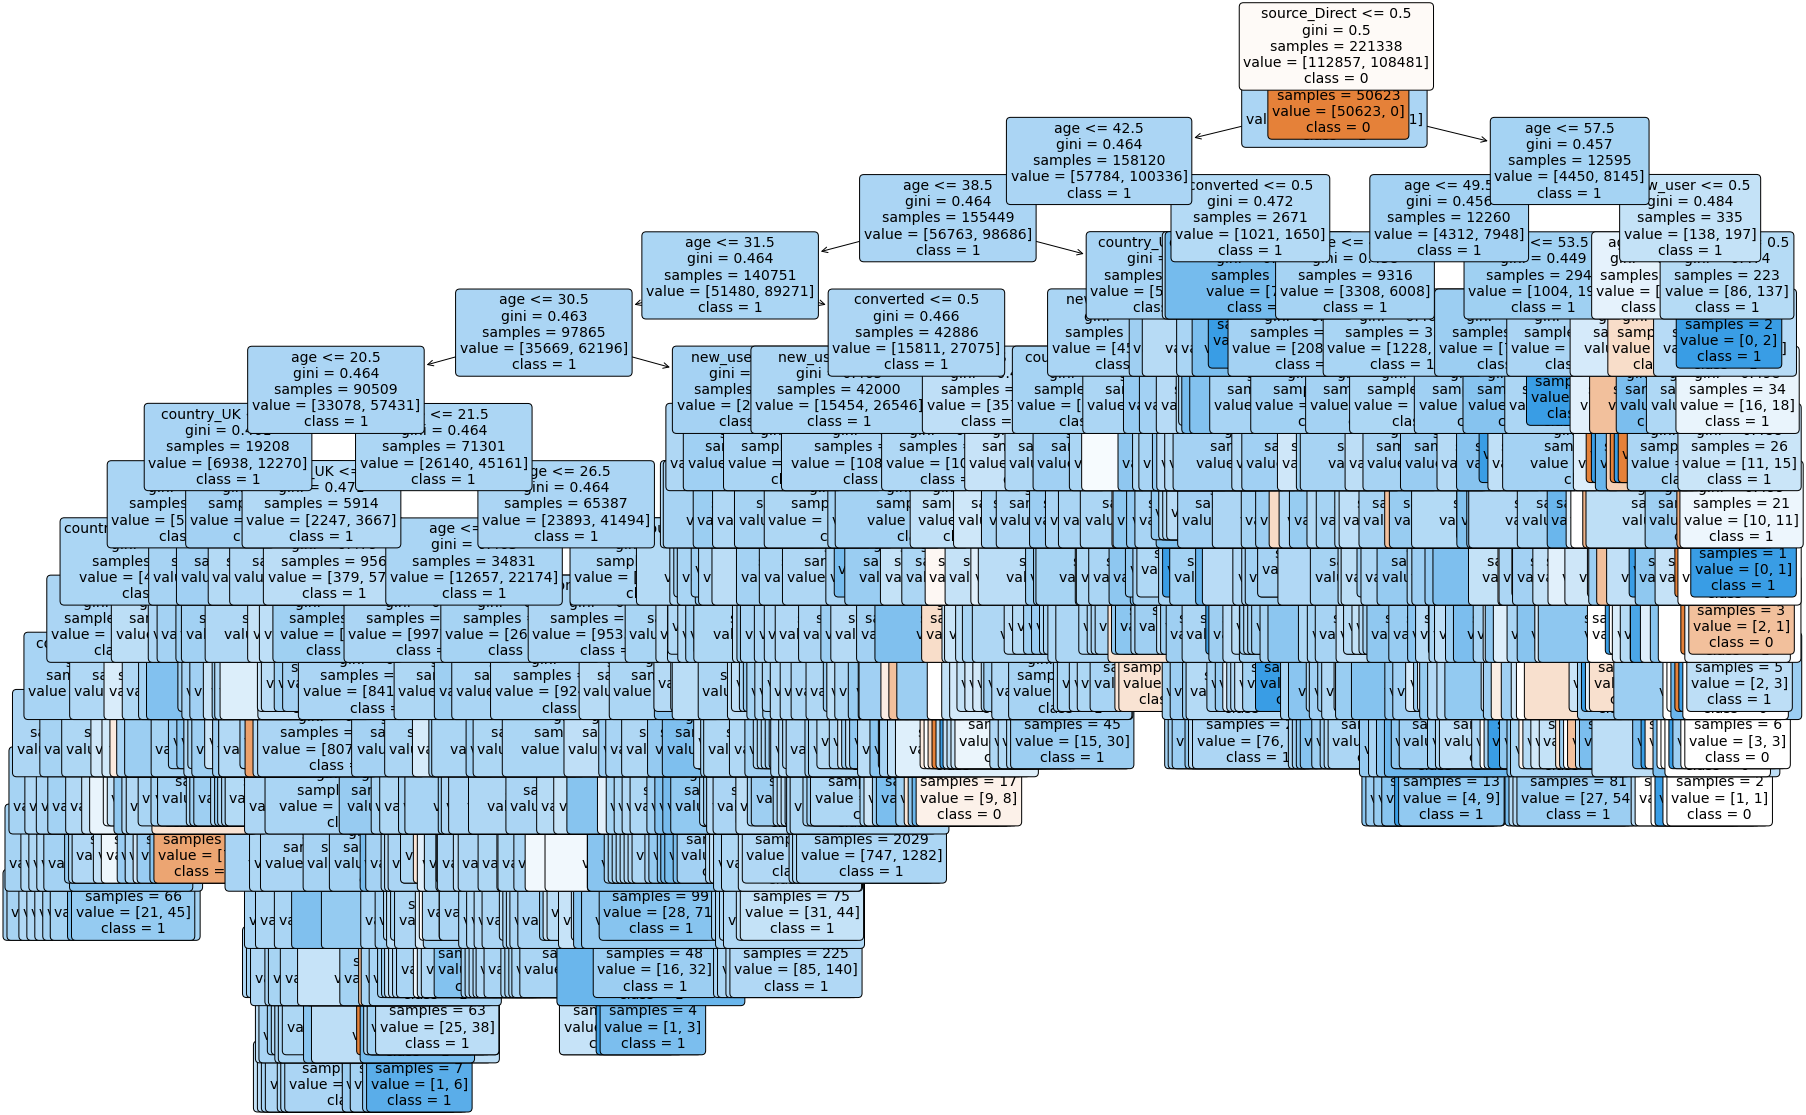

In [303]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,20))
a = plot_tree(tree_classifier, 
              feature_names=X.columns, 
              class_names=["0","1"], 
              filled=True, 
              rounded=True, 
              fontsize=14)

In [304]:
tree_classifier.score(X_test, y_test)

0.7199240986717268

In [305]:
yt_pred = tree_classifier.predict(X_test)

In [306]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=yt_pred))

              precision    recall  f1-score   support

           0       0.99      0.45      0.62     48302
           1       0.64      1.00      0.78     46558

    accuracy                           0.72     94860
   macro avg       0.81      0.72      0.70     94860
weighted avg       0.82      0.72      0.70     94860



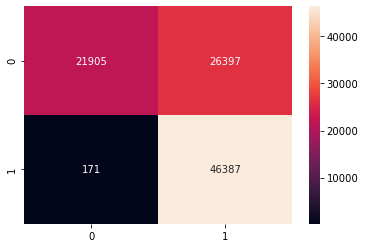

In [307]:
y1_pred = rf1_classifier.predict(X_test)
cm = confusion_matrix(y_test, yt_pred)
sns.heatmap(cm, annot=True,fmt='d')